In [30]:
import pygmo as pg
from pykep import epoch
from pykep.planet import jpl_lp
from pykep.planet import gtoc6
from pykep.trajopt import mga_1dsm
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [31]:
toftest=np.array([0.7 * 365.25, 3 * 365.25]).reshape(1, 2)
print(np.shape(toftest))
print(toftest)

(1, 2)
[[ 255.675 1095.75 ]]


In [32]:
print(epoch(-7000))

1980-Nov-01 00:00:00


In [33]:
# seq = [gtoc6('io'),gtoc6('europa'),gtoc6('ganymede')]
seq=[jpl_lp('earth'),jpl_lp('jupiter'),jpl_lp('saturn')]


In [34]:
udp = mga_1dsm(
    seq=seq,
    t0=[epoch(0), epoch(1000)],
    tof=[1.5 * 365.25, 4.5 * 365.25],
    vinf=[0.5, 7.5],
    add_vinf_dep=False,
    add_vinf_arr=True,
    multi_objective=False,
    tof_encoding='alpha'
)

pg.problem(udp)
# We solve it!!
uda = pg.sade(gen=100)
archi = pg.archipelago(algo=uda, prob=udp, n=8, pop_size=20)
print(
    "Running a Self-Adaptive Differential Evolution Algorithm .... on 8 parallel islands")
archi.evolve(10)
archi.wait()
sols = archi.get_champions_f()
idx = sols.index(min(sols))
print("Done!! Solutions found are: ", archi.get_champions_f())
udp.pretty(archi.get_champions_x()[idx])
# udp.plot(archi.get_champions_x()[idx])

Running a Self-Adaptive Differential Evolution Algorithm .... on 8 parallel islands
Done!! Solutions found are:  [array([13951.42862476]), array([13952.22686587]), array([13967.02536022]), array([13952.71691772]), array([13951.91216127]), array([13953.42058555]), array([13951.85252032]), array([13958.25133178])]
First Leg: earth to jupiter
Departure: 2000-Jul-31 13:41:15.586707 (212.5703192905955 mjd2000) 
Duration: 445.70100010287837days
VINF: 7.499999960931413 km/sec
DSM after 44.57023660719729 days
DSM magnitude: 4660.34193491863m/s

leg no. 2: jupiter to saturn
Duration: 1197.9232148226015days
Fly-by epoch: 2001-Oct-20 06:30:41.995596 (658.2713193934738 mjd2000) 
Fly-by radius: 29.999999111204 planetary radii
DSM after 509.72345214972177 days
DSM magnitude: 3568.189555503931m/s

Arrival at saturn
Arrival epoch: 2005-Jan-30 04:40:07.756269 (1856.1945342160755 mjd2000) 
Arrival Vinf: 5722.897134335317m/s
Total mission time: 4.4999978505831075 years (1643.62421492548 days)


In [35]:
print((archi.get_champions_x()[idx]))

[2.12570319e+02 1.12486525e-01 5.04306228e-01 7.49999996e+03
 1.00000306e-01 6.71637541e-01 1.56663508e+00 2.99999991e+01
 4.25505947e-01 3.43072367e-01 1.64362421e+03]


TypeError: Axes.scatter() got multiple values for argument 's'

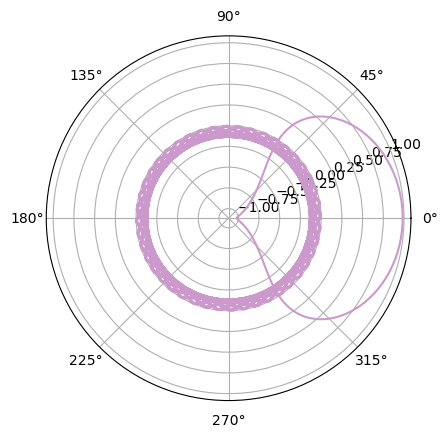

In [41]:
# Plot our trajectory
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1, 3, 1, projection='polar')
ax1 = udp.plot(archi.get_champions_x()[idx],ax=ax1)
